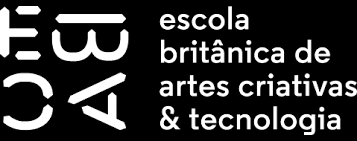

**Curso**: Cientista de Dados <br>
**Aluno**: Victor Resende

___

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [55]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from time import time  # Para medir o tempo de execução

filename_features = "UCI HAR Dataset/features.txt"
filename_labels = "UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "UCI HAR Dataset/train/y_train.txt"

filename_subtest = "UCI HAR Dataset/test/subject_test.txt"
filename_xtest = "UCI HAR Dataset/test/X_test.txt"
filename_ytest = "UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#").squeeze()  # Corrigido: usando squeeze() após leitura
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id']).squeeze()
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id']).squeeze()
X_test = pd.read_csv(filename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])


## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [28]:
# 1. Rodando a Árvore de Decisão
# Criando o modelo de árvore de decisão com ccp_alpha = 0.001
clf = DecisionTreeClassifier(ccp_alpha=0.001)

# Medindo o tempo de início
start_time = time()

# Treinando o modelo com os dados de treinamento
clf.fit(X_train, y_train)

# Medindo o tempo de fim
end_time = time()

# Avaliando a acurácia nas bases de treinamento e teste
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculando a acurácia
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Exibindo os resultados
print(f"Tempo de processamento: {end_time - start_time:.4f} segundos")
print(f"Acurácia na base de treinamento: {train_accuracy:.4f}")
print(f"Acurácia na base de teste: {test_accuracy:.4f}")




Tempo de processamento: 5.1765 segundos
Acurácia na base de treinamento: 0.9758
Acurácia na base de teste: 0.8799


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [30]:
# 2. PCA com 1 componente
pca = PCA(n_components=1)

# Aplicando o PCA nas bases de treinamento e teste
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Criando o modelo de árvore de decisão com ccp_alpha = 0.001 (como na tarefa anterior)
clf_pca = DecisionTreeClassifier(ccp_alpha=0.001)

# Medindo o tempo de início
start_time = time()

# Treinando o modelo com a componente principal
clf_pca.fit(X_train_pca, y_train)

# Medindo o tempo de fim
end_time = time()

# Avaliando a acurácia nas bases de treinamento e teste com a componente principal
y_train_pred_pca = clf_pca.predict(X_train_pca)
y_test_pred_pca = clf_pca.predict(X_test_pca)

# Calculando a acurácia
train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)

# Exibindo os resultados
print(f"Tempo de processamento (com PCA): {end_time - start_time:.4f} segundos")
print(f"Acurácia na base de treinamento (com PCA): {train_accuracy_pca:.4f}")
print(f"Acurácia na base de teste (com PCA): {test_accuracy_pca:.4f}")



Tempo de processamento (com PCA): 0.0490 segundos
Acurácia na base de treinamento (com PCA): 0.4997
Acurácia na base de teste (com PCA): 0.4571


### Análise:

- Diminuiu o tempo de processamento
- Acurácias tanto na base de treino quanto na base de teste tiveram um resultado inferior ao da Árvore de Decisão.
- O que indica uma perda significativa de informação ao reduzir as variáveis para apenas uma componente. Isso é esperado, já que com uma única componente, o modelo não consegue capturar toda a variabilidade presente nos dados originais
- Para melhorar o equilíbrio entre tempo e precisão, seria interessante testar com mais componentes no PCA, o que poderia melhorar a acurácia mantendo um ganho no tempo de processamento.

## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [51]:
import time

# Lista de componentes a serem testados
n_components_list = [1, 2, 5, 10, 50]

# Resultados
resultados = []

# Função para rodar o modelo com PCA e árvore de decisão
def rodar_arvore_com_pca(n_components):
    try:
        # PCA com n componentes
        pca = PCA(n_components=n_components)

        # Transformando os dados
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Criando e treinando a árvore de decisão
        arvore = DecisionTreeClassifier(ccp_alpha=0.001)

        # Medindo o tempo de processamento
        start_time = time.time()
        arvore.fit(X_train_pca, y_train)
        treino_time = time.time() - start_time

        # Acurácia no treino e teste
        y_train_pred = arvore.predict(X_train_pca)
        y_test_pred = arvore.predict(X_test_pca)

        acuracia_treino = accuracy_score(y_train, y_train_pred)
        acuracia_teste = accuracy_score(y_test, y_test_pred)

        return {
            'n_components': n_components,
            'tempo_processamento': treino_time,
            'acuracia_treino': acuracia_treino,
            'acuracia_teste': acuracia_teste
        }
    
    except Exception as e:
        print(f"Erro ao processar n_components={n_components}: {e}")
        return None

# Testando para cada número de componentes
for n_components in n_components_list:
    resultado = rodar_arvore_com_pca(n_components)
    if resultado is not None:
        resultados.append(resultado)

# Transformando resultados em DataFrame para fácil visualização
df_resultados = pd.DataFrame(resultados)
print(df_resultados)


   n_components  tempo_processamento  acuracia_treino  acuracia_teste
0             1             0.068119         0.499728        0.457075
1             2             0.043279         0.612758        0.584662
2             5             0.057925         0.846028        0.788599
3            10             0.149207         0.892410        0.824228
4            50             0.646000         0.920974        0.820156


## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

- Tivemos uma melhora com a acurácia.
- Com um tempo de processamento rápido e satifatório para o nosso modelo.

### Visualizando os dados:

Acurácia e tempo de processamento em relação ao número de componentes principais.

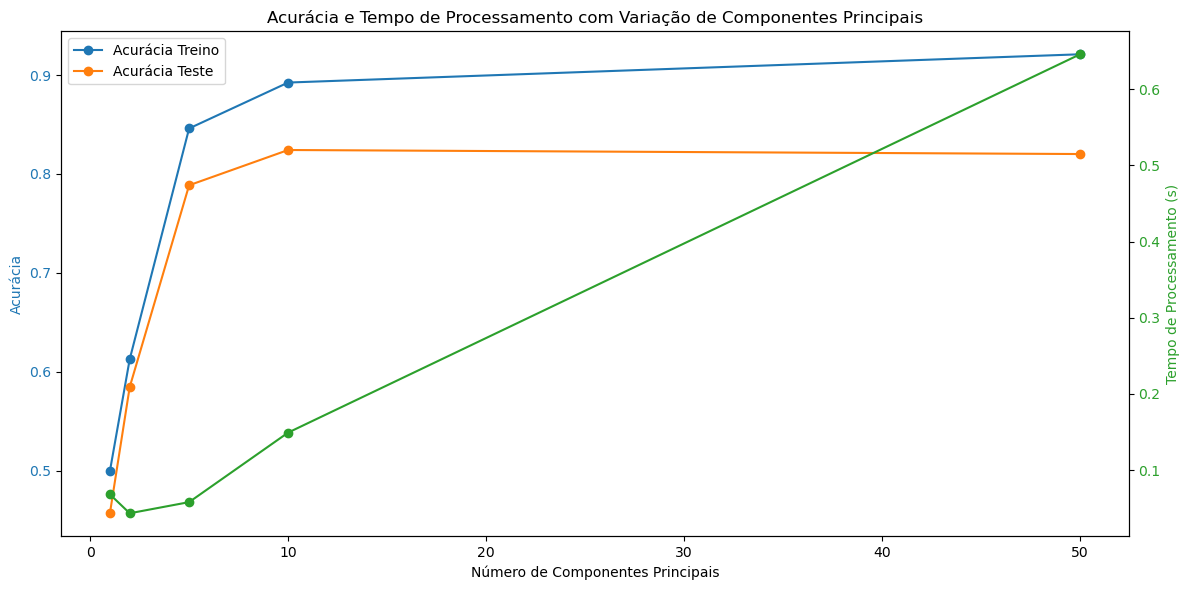

In [56]:
import matplotlib.pyplot as plt

# Plotando a acurácia e o tempo de processamento
fig, ax1 = plt.subplots(figsize=(12, 6))

# Acurácia nas bases de treino e teste
ax1.set_xlabel('Número de Componentes Principais')
ax1.set_ylabel('Acurácia', color='tab:blue')
ax1.plot(df_resultados['n_components'], df_resultados['acuracia_treino'], marker='o', label='Acurácia Treino', color='tab:blue')
ax1.plot(df_resultados['n_components'], df_resultados['acuracia_teste'], marker='o', label='Acurácia Teste', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Criando um segundo eixo para o tempo de processamento
ax2 = ax1.twinx()
ax2.set_ylabel('Tempo de Processamento (s)', color='tab:green')
ax2.plot(df_resultados['n_components'], df_resultados['tempo_processamento'], marker='o', label='Tempo de Processamento', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Título e exibição do gráfico
plt.title('Acurácia e Tempo de Processamento com Variação de Componentes Principais')
fig.tight_layout()
plt.show()


___